### 9.1 用多项式回归法拟合正弦曲线
依然是单层神经网络，首先拟合一个正弦曲线，先读取数据：

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from HelperClass.NeuralNet_1_2 import *

file_name = "ch09_1.train.npz"
reader = DataReader_1_3(file_name)
reader.ReadData()
print("X数据：\n",reader.XRaw[:3])
print("Y数据：\n",reader.YRaw[:3])

X数据：
 [[0.82883643]
 [0.09618617]
 [0.62155319]]
Y数据：
 [[-0.87166035]
 [ 0.48192171]
 [-0.71338129]]


可见只有一个$x$特征值，和一个$y$。  
首先可视化画出数据图像：

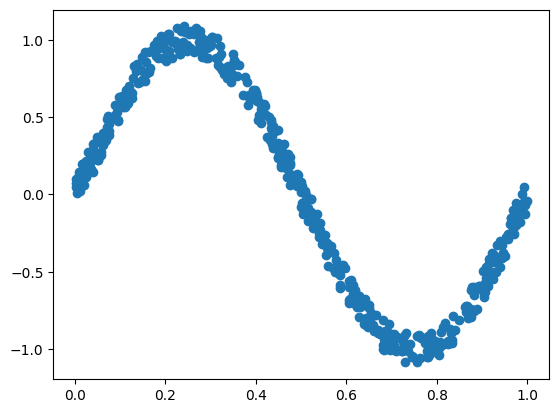

In [2]:
plt.scatter(reader.XRaw[:,0],reader.YRaw[:,0])

由于要用三次多项式拟合，所以需要再增加两列$x$的值，做数据增强：

In [3]:
# 求得整列的二次方
X = reader.XTrain[:,]**2
# 将新求得的列添加到数据的右侧
reader.XTrain = np.hstack((reader.XTrain, X))
X = reader.XTrain[:,0:1]**3
reader.XTrain = np.hstack((reader.XTrain, X))
print(reader.XTrain[0:3])

[[0.82883643 0.68696982 0.56938561]
 [0.09618617 0.00925178 0.00088989]
 [0.62155319 0.38632836 0.24012363]]


开始训练，设置每批10个输入，先获取一组样本值

In [4]:
batch_size = 10
batch_x, batch_y = reader.GetBatchTrainSamples(batch_size, 0)
print(batch_x)

[[8.28836425e-01 6.86969820e-01 5.69385610e-01]
 [9.61861732e-02 9.25177992e-03 8.89893305e-04]
 [6.21553186e-01 3.86328363e-01 2.40123625e-01]
 [1.76700894e-01 3.12232061e-02 5.51716844e-03]
 [4.76401958e-01 2.26958826e-01 1.08123629e-01]
 [1.00342150e-01 1.00685470e-02 1.01029965e-03]
 [5.73746447e-01 3.29184985e-01 1.88868716e-01]
 [6.28414250e-01 3.94904469e-01 2.48163596e-01]
 [9.21556689e-01 8.49266731e-01 7.82647437e-01]
 [5.07117928e-01 2.57168593e-01 1.30414804e-01]]


初始化$w,b$的值：

In [5]:
input_size = 3
output_size = 1
W = np.zeros((input_size, output_size))
B = np.zeros((1, output_size))

开始前向计算，直接使用线性方程 $z = wx + b$：

In [6]:
def forwardBatch(batch_x):
    return np.dot(batch_x, W) + B
batch_a = forwardBatch(batch_x)
print(batch_a[:,0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


反向传播：
$$
\frac{\partial loss}{\partial z_i}=a_i-y_i 
$$
$$
w=\frac{1}{m} X^{\top} \cdot (Z-Y) 
$$
$$
b=\frac{1}{m}(Z-Y)
$$

In [7]:
def backwardBatch(batch_x, batch_y, batch_a):
    m = batch_x.shape[0]
    dZ = batch_a - batch_y
    dB = dZ.sum(axis=0, keepdims=True)/m
    dW = np.dot(batch_x.T, dZ)/m
    return dW, dB
dW, dB = backwardBatch(batch_x,batch_y,batch_a)

更新参数：

In [8]:
eta = 0.2
W = W - eta * dW
B = B - eta * dB

直接开始训练了

epoch=0
epoch=1
epoch=2
epoch=3
epoch=4
epoch=5
epoch=6
epoch=7
epoch=8
epoch=9
9 499 0.09945350449891943
epoch=10
epoch=11
epoch=12
epoch=13
epoch=14
epoch=15
epoch=16
epoch=17
epoch=18
epoch=19
19 999 0.09480857806860127
epoch=20
epoch=21
epoch=22
epoch=23
epoch=24
epoch=25
epoch=26
epoch=27
epoch=28
epoch=29
29 1499 0.09412324707332473
epoch=30
epoch=31
epoch=32
epoch=33
epoch=34
epoch=35
epoch=36
epoch=37
epoch=38
epoch=39
39 1999 0.10323940294294869
epoch=40
epoch=41
epoch=42
epoch=43
epoch=44
epoch=45
epoch=46
epoch=47
epoch=48
epoch=49
49 2499 0.09376553420052237
epoch=50
epoch=51
epoch=52
epoch=53
epoch=54
epoch=55
epoch=56
epoch=57
epoch=58
epoch=59
59 2999 0.0881341866751607
epoch=60
epoch=61
epoch=62
epoch=63
epoch=64
epoch=65
epoch=66
epoch=67
epoch=68
epoch=69
69 3499 0.08549751706460275
epoch=70
epoch=71
epoch=72
epoch=73
epoch=74
epoch=75
epoch=76
epoch=77
epoch=78
epoch=79
79 3999 0.08421577372091575
epoch=80
epoch=81
epoch=82
epoch=83
epoch=84
epoch=85
epoch=86
epoch=8

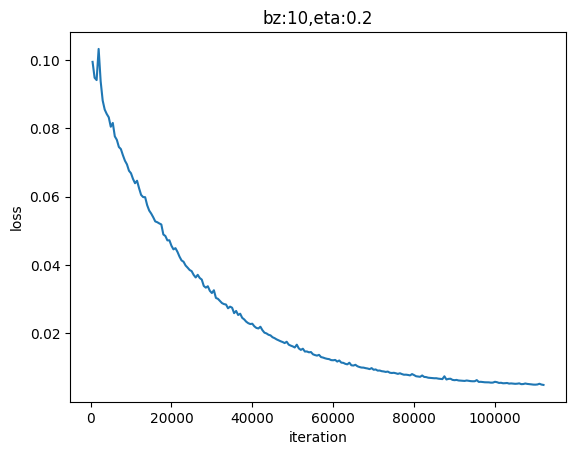

W= [[ 10.41746161]
 [-30.92786244]
 [ 20.66959451]]
B= [[-0.07050094]]


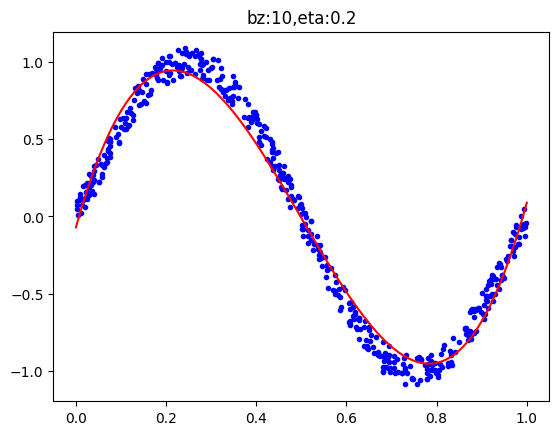

In [9]:
params = HyperParameters_1_1(input_size, output_size, eta=eta, max_epoch=10000, batch_size=batch_size, eps=0.005, net_type=NetType.Fitting)
net = NeuralNet_1_2(params)
net.train(reader, checkpoint=10)
def ShowResult(net, dataReader, title):
    # draw train data
    X,Y = dataReader.XTrain, dataReader.YTrain
    plt.plot(X[:,0], Y[:,0], '.', c='b')
    # create and draw visualized validation data
    TX1 = np.linspace(0,1,100).reshape(100,1)
    TX = np.hstack((TX1, TX1[:,]**2))
    TX = np.hstack((TX, TX1[:,]**3))
    TY = net.inference(TX)
    plt.plot(TX1, TY, c='r')
    plt.title(title)
    plt.show()
ShowResult(net, reader, params.toString())